# Laplace Transform Definition

## Intended Learning Outcomes
By the end of this section, you should be able to:

- State the formal definition of the Laplace transform.

- Recognize the role of the transform as a mapping from functions of time $t$ to functions of $s$.

- Explain in words why the Laplace transform is useful for simplifying the analysis of differential equations.

- Compute the Laplace transform of simple functions directly from the definition.

**This text is still undergoing improvements:**  Please report any errors or things that are unclear to [https://github.com/joelmiller/Laplace/issues](https://github.com/joelmiller/Laplace/issues)



## Introduction

The Laplace Transform is an operation that converts a function $f(t)$ of (non-negative) time $t \geq 0$ into a function $\tilde{f}(s)$ of a new variable $s$  The properties of the Laplace Transform mean that if we take the Laplace Transform of both sides of the *differential equation* for $f(t)$, Equation {eq}`eq:basic_driven_ODE`, then the result is a new *algebraic equation* for $\tilde{f}(s)$.

Once we solve this algebraic equation and find $\tilde{f}(s)$ we will be able to invert the transform to find $f(t)$. 




```{figure} ../images/Laplace_solution_diagram.png
---
height: 250px
name: fig:Laplace_Solution_Diagram
---
Given a constant coefficient linear differential equation for $f(t)$, we can use methods of Calculus to find $f(t)$ directly, or we can use the Laplace Transform to convert the differential equation into an Algebraic equation for $\tilde{f}(s)$.  Then we can solve the Algebraic equation for $\tilde{f}(s)$ and then invert the Laplace Transform to find $f(t)$.
```

The Laplace Transform is defined as follows:
````{prf:definition} The Laplace Transform
:label: Def_Laplace

The Laplace Transform is an *integral transform* that takes as input a piecewise continuous function $f(t)$ that is defined for non-negative $t$: $f:[0,\infty) \to \mathbb{R}$ and produces a new function $\tilde{f}(s) = \mathcal{L}[f(t)](s)$ using the integral

$$
\mathcal{L}[f(t)](s) = \int_0^\infty f(t) e^{-st} \, dt
$$

The Laplace Transform is only defined if this integral exists (that is, if the integral is finite).
````

For some functions $f(t)$ the Laplace Transform will only be defined for $s$ above some threshold.  For other functions it may not be defined at all.

We will use the notation $\tilde{f}(s)$ as a short-hand for $\mathcal{L}[f(t)](s)$.  Usually it will be easier to use $\tilde{f}(s)$, but sometimes the longer notation with $\mathcal{L}$ is used, especially if we are dealing with the transform of the sum or product of two functions. 


We usually won't use the definition of the Laplace Transform to find the Laplace Transform of a function.  Just like we don't usually use the definition of the derivative to compute a derivative, but rather we use a set of derivative rules, we will create a table of  Laplace Transforms rules to use.


## Introductory example


Consider the function $f(t)=e^{-t}$.  
Before we try to find $\mathcal{L}[e^{-t}](s)$ for general $s$, we will first try to find its value for a specific value of $s$.  We start with $s=3$, so we perform the integral $\int_0^\infty  e^{-t} e^{-3t} \, dt$.

````{prf:example} Finding $\mathcal{L}[e^{-t}](3)$

According to the definition, when $s=3$:

\begin{align*}
\mathcal{L}[e^{-t}](3) &= \int_0^\infty  e^{-t} e^{-3t} \, dt\\
&= \int_0^\infty e^{-4t} \, dt
\end{align*}

We need to be a little careful with the $\infty$ in the upper terminal.  Technically we should do it by

$$
\int_0^\infty  e^{-4t} \, dt = \lim_{b\to \infty} \int_0^b e^{-4t} \, dt
$$

So we are trying to find the area under the curve $ e^{-4t}$.  We can visualize the curve $e^{-4t}$ with the block of code below this example.

From the plot below, we see that despite having an infinite domain $0 \leq t < \infty$ the product $f(t)e^{-3t}$ decays so quickly to $0$ that the area appears finite.  We can calculate it exactly.
\begin{align*}
\int_0^\infty  f(t) e^{-3t} \, dt = &= \lim_{b\to\infty} \int_0^b  f(t) e^{-3t} \, dt \\
&=\lim_{b\to\infty} \int_0^b e^{-t} e^{-3t} \, dt \\
&= \lim_{b\to \infty} \int_0^b e^{-4t}  \, dt\\
&= \lim_{b\to \infty} \left. - \frac{1}{4}e^{-4t} \right|_{t=0}^b\\
&= \lim_{b\to \infty}  -\frac{1}{4} e^{-4 b}  - \left( - \frac{1}{4} e^0 \right)\\
&= 0 + \frac{1}{4}\\
&= \frac{1}{4}
\end{align*}
We used the fact that if $a<0$, then $e^{ab} \to 0$ as $b \to \infty$.

So the area under the curve is indeed finite, even though the right boundary goes off to $\infty$.

````

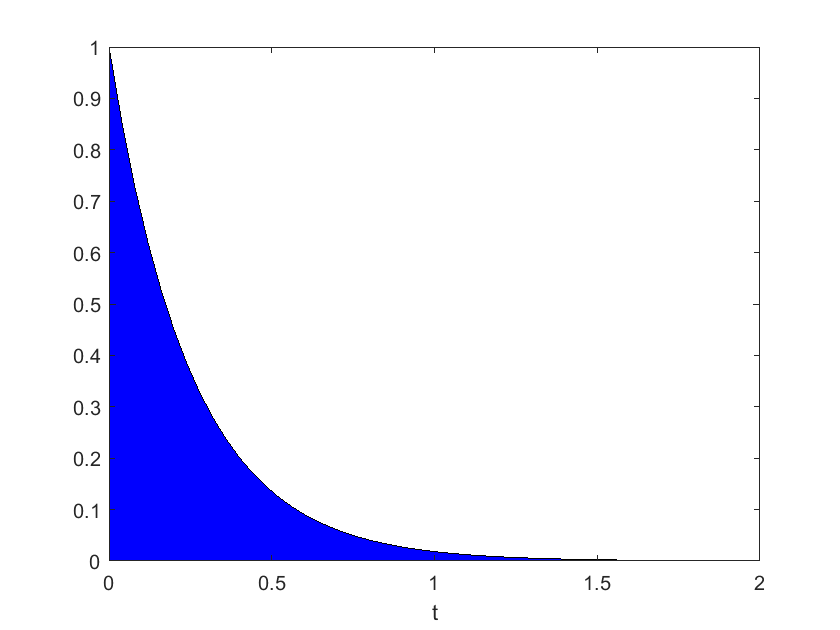

In [2]:

t = linspace(0,2,51);
f = exp(-t);

plot(t, f.*exp(-3*t), color='red')
area(t, f.*exp(-3*t),  "FaceColor", "blue");

xlabel('t')


### Finding $\mathcal{L}[e^{-t}](s)$ for general $s$
We could try to repeat the integral with $s= 2, 0, -1/2$, and every other value, but it would take forever. Rather than repeating over and over, we use $-s$ to replace $-3$ in the steps above  so that we only have to integrate once.  The steps are the same.

````{prf:example} The Laplace Transform of $e^{-t}$
:label: example_Lap_e^-t
To find the Laplace Transform of $e^{-t}$, we use the integral in {prf:ref}`Def_Laplace`:
\begin{align*}
\mathcal{L}[f(t)](s) &= \int_0^\infty  f(t) e^{-st} \, dt\\
 &= \lim_{b\to\infty} \int_0^b  f(t) e^{-st} \, dt \\
&=\lim_{b\to\infty} \int_0^b e^{-t} e^{-st} \, dt \\
&= \lim_{b\to \infty} \int_0^b e^{-(s+1)t}  \, dt\\
&= \begin{cases}
\displaystyle \lim_{b\to \infty} \left. - \frac{1}{s+1}e^{-(s+1)t} \right|_{t=0}^b & s\neq -1\\
\displaystyle \lim_{b\to \infty} t|_{t=0}^b & s=1
\end{cases}\\
&= \begin{cases}
\displaystyle \lim_{b\to \infty}  -\frac{1}{s+1} e^{-(s+1) b}  - \left( - \frac{1}{s+1} e^0 \right) & s \neq 1\\
\displaystyle \lim_{b\to \infty} b  & s = 1
\end{cases}\\
&= \begin{cases}
\frac{1}{s+1} & \text{if $s>-1$}\\
\infty  & s \leq -1
\end{cases}
\end{align*}
So we conclude that $\tilde{f}(s) = 1/(s+1)$ if $s>-1$ and infinite otherwise.  
We'll look at a few values of $s$ to verify where the integral is finite/infinite:


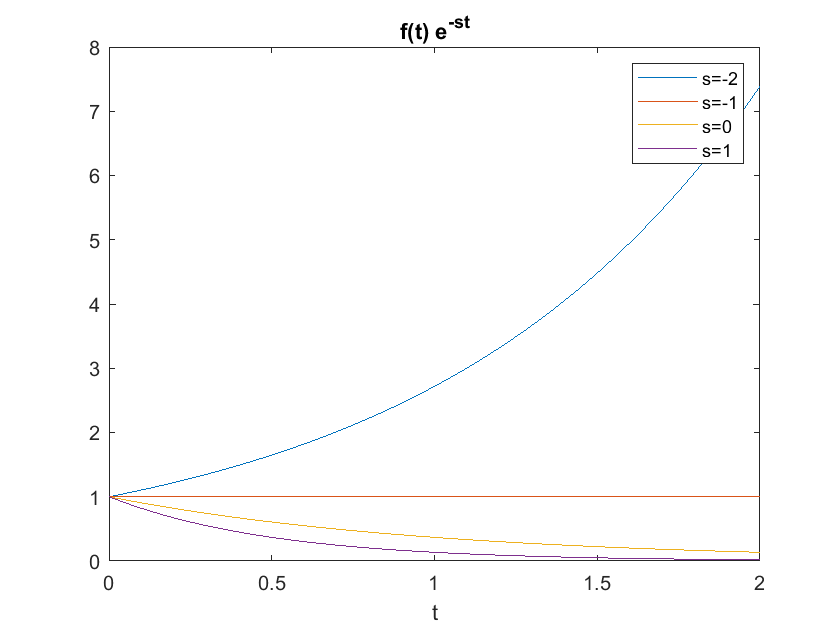

In [3]:
% this cell uses the same t and f as the 
% previous code cell
for s = [-2, -1, 0, 1]
    label = ['s=' num2str(s)];
    plot(t, f.*exp(-s*t), 'DisplayName', label);
    hold on
end
legend()
title('f(t) e^{-st}')
xlabel('t')


When $s=-1$, the function $f(t)e^{-st}$ is $1$, so the area under it between $t=0$ to $t=\infty$ is infinite.  When $s<-1$, $f(t)e^{-st}$ is an increasing function, so again the area is infinite.  For $s>1$ it is a decaying exponential with a finite area under it.

We have been careful using limits to handle the terminal at infinity.  We will now use a shortcut.  We will allow $\infty$ to appear in our equations without formally writing out the limit.  If we do this, then any finite number divided by $\infty$ is $0$.  As long as only one thing in our equations ends up going to infinity, this shortcut is okay to use,.  However, if we encounter things like $\infty/\infty$ or $\infty-\infty$, then we need to back up and use the limits carefully.

## Examples

````{prf:example} The Laplace Transform of $e^t$
:label: ex:Lap_e^t
To find the Laplace Transform of $e^t$ we take the integral
\begin{align*}
\tilde{f}(s) &= \int_0^\infty e^t e^{-st} \, dt \\
 &= \int_0^\infty e^{(1-s)t} \, dt\\
 &= \left. \frac{1}{1-s} e^{(1-s)t} \right|_{t=0}^\infty\\
 &= \frac{1}{1-s} \left( e^{(1-s)\infty} - e^0\right)\\
 &= \frac{1}{s-1} \left( 1- e^{(1-s)\infty}\right)\\
 &=  \frac{1}{s-1}  \qquad \text{if } s>1
\end{align*}
````

````{prf:example} The Laplace Transform of $\cos(4t)$
:label: ex:Lap_cos4t
To find the Laplace Transform of $\cos(4t)$ we calculate the integral in 
{prf:ref}`Def_Laplace`

$$
\tilde{f}(s) = \int_0^\infty \cos(4t)e^{-st} \, dt
$$

We now integrate by parts.  In MAT1002, an optional tabular approach was taught for integration by parts.  

```{figure} ../images/int_by_parts_tabular_cos4t.png
---
height: 150px
name: fig:tabular_int_by_parts
---
The tabular approach for integrating $\cos( 4t) e^{-st}$ by parts.
```

From this, we conclude that

\begin{align*}
\tilde{f}(s) =& \int_0^\infty \cos(4t) e^{-st} \, dt\\
 &=  \left[ \cos(4t)\frac{(-e^{-st})}{s} - (-4\sin(4t)) \frac{e^{-st}}{s^2} \right|_{t=0}^\infty +\int_0^\infty -16 \cos(4t) \frac{e^{-st}}{s^2} \, dt\\
&= 0 - \frac{(-1)}{s} + 4 \left(0 - 0 \frac{1}{s^2}\right) - \frac{16}{s^2}  \int_0^\infty \cos(4t) e^{-st} \, dt \qquad &\text{if }s>0\\
&+ \frac{1}{s} - \frac{16}{s^2} \tilde{f}(s) & s>0\\
\end{align*}
We have expressed $\tilde{f}(s)$ in terms of some things we can calculate and a multiple of $\tilde{f}(s)$.  It might seem that we're back where we started, but Algebra comes to the rescue.  We move the terms with $\tilde{f}(s)$ to the left hand side:
\begin{align*}
\Rightarrow \tilde{f}(s) \left(1 + \frac{16}{s^2}\right) =& \frac{1}{s} \qquad &s>0\\
\Rightarrow \tilde{f}(s) =& \frac{1}{s} \frac{s^2}{s^2+16}&s>0\\
=& \frac{s}{s^2+16}&s>0
\end{align*}


If you didn't learn the tabular method for integration by parts, you would have learned a formula like

\begin{align*}
\int_a^b u(t) v'(t) \, dt = u(t) v(t) |_{t=a}^b - \int_a^b u'(t)v(t) \, dt
\end{align*}
so integration be parts has the effect of taking a derivative away from $v$ (i.e., integrating $v'$) and putting it on $u$ (i.e., differentiating $u$).

In our case, we set $u(t) = \cos(4t)$ and $v'(t) = e^{-st}$.  If we integrate by parts twice (details not shown), we end up with 

$$
\int_0^\infty \cos(4t) e^{-st} \, dt =  \left[ \cos(4t)\frac{(-e^{-st})}{s} - (-4)\sin(4t) \frac{e^{-st}}{s^2} \right|_{t=0}^\infty - \int_0^\infty 16 \cos(4t) \frac{e^{-st}}{s^2} \, dt
$$

which is the result above immediately after applying the tabular approach.  From this point we follow the same steps.

Either way, we discover that if $f(t) = \cos(4t)$, then $\tilde{f}(s) = \frac{s}{s^2+16}$, with the restriction that $s>0$.
````

````{prf:example} Laplace Transform of a discontinuous function
:label: Example:H1

Consider the function 

$$
f(t) = \begin{cases} 0 & t< 2\\ 1 & t \geq 2 \end{cases}
$$

Later we will refer to this function as $H_2(t)$.

Using the definition of the Laplace Transform, 
\begin{align*}
\mathcal{L}[f(t)](s) &= \int_0^\infty f(t) e^{-st} \, dt\\
                     &= \int_0^2 f(t) e^{-st} \, dt + \int_2^\infty f(t) e^{-st} \, dt\\
                     &= \int_0^2 0 \, dt + \int_2^\infty e^{-st} \, dt\\
                     &= 0 + \left[ \frac{1}{-s} e^{-st} \right|_{t=2}^\infty \\
                     &= \frac{e^{-2s}}{s} & s>0
\end{align*}
````


### More general Laplace Transforms
It's useful to know $\mathcal{L}[e^t](s)$ and $\mathcal{L}[\cos(4t)](s)$, but in general we will find it more useful to have $\mathcal{L}[e^{at}](s)$ and $\mathcal{L}[\cos(\omega t)](s)$ for any $a$ or $\omega$  (Here the variable $\omega$ is "omega", not "double-u".  It is often used for a frequency.).

````{prf:example} $\mathcal{L}[e^{at}](s)$
:label: ex:Lap_e^at
To find the Laplace Transform of $f(t)=e^{at}$ we follow the same steps as before.

\begin{align*}
\tilde{f}(s) &= \int_0^\infty e^{at} e^{-st} \, dt \\
 &= \int_0^\infty e^{(a-s)t} \, dt\\
 &= \left. \frac{1}{a-s} e^{(a-s)t} \right|_{t=0}^\infty\\
 &= \frac{1}{a-s} \left( e^{(a-s)\infty} - e^0\right)\\
 &= \frac{1}{s-a} \left( 1- e^{(a-s)\infty}\right)\\
 &=  \frac{1}{s-a}  \qquad \text{if } s>a
\end{align*}
````



````{prf:example} The Laplace Transform of $f(t) = \cos(\omega t)$
:label: ex:Lap_cos_omegat

To find the Laplace Transform of $\cos(\omega t)$ we follow the steps we used for $\cos(4t)$

$$
\tilde{f}(s) = \int_0^\infty \cos(\omega t)e^{-st} \, dt
$$

We now integrate by parts.  It proceeds very much as in the case of $\omega=4$:

```{figure} ../images/int_by_parts_tabular_cos_omega_t.png
---
height: 150px
name: fig_tabular_int_by_parts_general
---
The tabular approach for integrating $\cos(\omega t) e^{-st}$ by parts.
```


From this, we conclude that

\begin{align*}
\tilde{f}(s) =& \int_0^\infty \cos(\omega t) e^{-st} \, dt & \\
 =&  \left[ \cos(\omega t)\frac{(-e^{-st})}{s} - (-\omega \sin(\omega t)) \frac{e^{-st}}{s^2} \right|_{t=0}^\infty&  \\
&\quad +\int_0^\infty -\omega^2 \cos(\omega t) \frac{e^{-st}}{s^2} \, dt& \\
=& 0 - \frac{(-1)}{s} + \omega \left(0 - 0 \frac{1}{s^2}\right)   \qquad &\text{if } s>0 \\
&\quad - \frac{\omega^2}{s^2}  \int_0^\infty \cos(\omega t) e^{-st} \, dt &\\
=& \frac{1}{s} - \frac{\omega^2}{s^2} \tilde{f}(s) & s>0\\
\Rightarrow
\tilde{f}(s) \left( 1 + \frac{\omega^2}{s^2}\right) =& \frac{1}{s} & s>0\\
\Rightarrow
\tilde{f}(s) =& \frac{1}{s} \frac{s^2}{s^2+\omega^2} & s>0\\
= & \frac{s}{s^2+\omega^2} & s>0
\end{align*}
So $\tilde{f}(s) = s/(s^2+\omega^2)$ as long as $s>0$. It is undefined if $s \leq 0$.
````

## Self-test

1. Use the definition of the Laplace Transform to find the Laplace Transform of $f(t)=1$.
2. Use the definition of the Laplace Transform to find the Laplace Transform of $f(t)=t$.
3. Use integration by parts to find the Laplace Transform of $f'(t)$ in terms of the Laplace Transform of $f(t)$.
4. (\*) Show that for any specified $s$ the function $f(t) = e^{t^2}$ is larger than $e^{st}$ once $t$ is large enough.  Use this to show that for any $s$, $\int_0^\infty e^{t^2} e^{-st} \, dt$ is undefined.  This question establishes that there are functions whose Laplace Transform does not exist for any $s$.